In [3]:
import pandas as pd
trends = pd.read_csv("Datasets/trends_kj_sisters.csv")
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [4]:
trends.columns=["month", "kim", "khloe", "kourtney", "kendall", "kylie"]
trends.head()

,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [5]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     147 non-null    object
 1   kim       147 non-null    int64 
 2   khloe     147 non-null    object
 3   kourtney  147 non-null    object
 4   kendall   147 non-null    object
 5   kylie     147 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


In [6]:
trends["month"] = pd.to_datetime(trends["month"])

for col in trends.columns:
    if "<" in trends[col].to_string():
        trends[col] = trends[col].str.replace("<", "")
        trends[col] = pd.to_numeric(trends[col])

trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     147 non-null    datetime64[ns]
 1   kim       147 non-null    int64         
 2   khloe     147 non-null    int64         
 3   kourtney  147 non-null    int64         
 4   kendall   147 non-null    int64         
 5   kylie     147 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.0 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,2
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,2


<Axes: xlabel='month'>

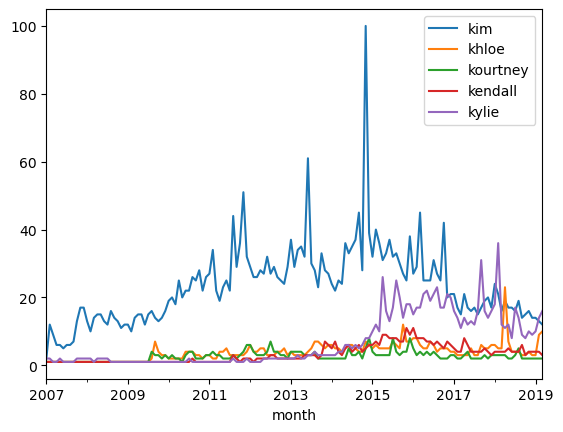

In [7]:
trends = trends.set_index("month")

trends.plot()

<Axes: xlabel='month'>

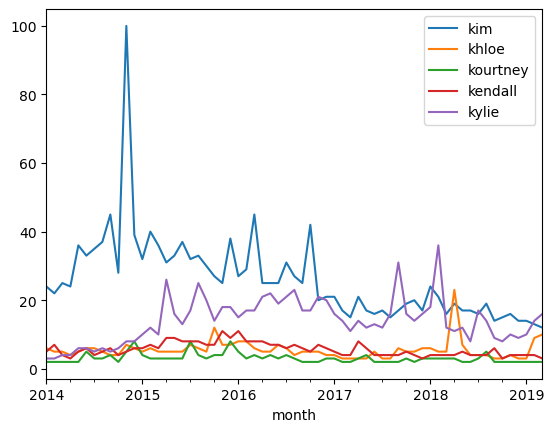

In [8]:
# Zoom in from January 2014
trends.loc["2014-01-01" :].plot()

## Kylie's rise

It looks like my suspicion may be true: Kim is not always the most searched Kardashian or Jenner sister. Since late-2016, at various months, Kylie overtakes Kim. Two big spikes where she smashed Kim's search interest: in September 2017 when it was reported that Kylie was expecting her first child with rapper Travis Scott and in February 2018 when she gave birth to her daughter, Stormi Webster. The continued success of Kylie Cosmetics has kept her in the news, not to mention making her the "The Youngest Self-Made Billionaire Ever" according to Forbes
These fluctuations are descriptive but do not really help us answer our question: is Kim even the most famous sister anymore? We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.

<Axes: xlabel='month'>

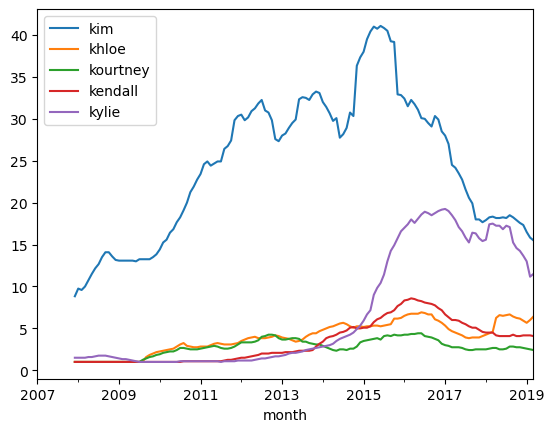

In [9]:
trends.rolling(window=12).mean().plot()

<Axes: xlabel='month'>

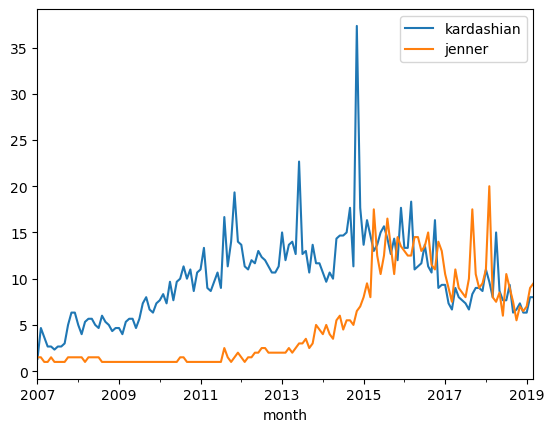

In [10]:
# Who's more famous? The Kardashians or the Jenners?

trends["kardashian"] = (trends.kim + trends.khloe + trends.kourtney) / 3
trends["jenner"] = (trends.kendall + trends.kylie) / 2

trends[['kardashian', 'jenner']].plot()